## 作業:
課程範例以 訓練資料集來檢視，先看一下測試資料特性，再把測試資料集和訓練資料集合併，並回答下列問題，   
目的:讓大家熟悉對應這樣的問題，我們要提取怎樣的函數來進行計算。   

* Q1: 觀察測試(test)資料集和訓練(Train)資料集的變數的差異性?
* Q2: 測試資料集是否有遺失值?
* Q3: 從合併資料選取一個變數，嘗試去做各種不同遺失值的處理，並透過圖形或數值來做輔助判斷，補值前與後的差異，你覺得以這個變數而言，試著說明每一個方法的差異。   


In [2]:
#把需要的 library import 進來
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
#讓圖可以在 jupyter notebook顯示
%matplotlib inline

In [3]:
#顯示圖形的函數，可不先不用理解，直接用
from IPython.display import display
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [4]:
# 把兩個訓練資料集和測試資料集讀進來

test = pd.read_csv("Titanic_test.csv")
train = pd.read_csv("Titanic_train.csv")

## Q1: 判斷 測試資料集和訓練資料集欄位變數是否有差異性?

In [6]:
# Q1: 判斷 測試資料集和訓練資料集欄位變數是否有差異性?
display(test.head(5))

display(train.head(5))

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
test.info()
print("====================================================")
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass  

In [67]:
print(train.columns)
print(test.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


## A1 : Test 資料集沒有 'Survived'

## Q2: 測試資料集是否有遺失值?

In [9]:
#可以嘗試用範例的程式

print(test.isnull().head(5))
print("====================================================")
print(test.isnull().any())
print("====================================================")
print(test.isnull().any().sum())


   PassengerId  Pclass   Name    Sex    Age  SibSp  Parch  Ticket   Fare  \
0        False   False  False  False  False  False  False   False  False   
1        False   False  False  False  False  False  False   False  False   
2        False   False  False  False  False  False  False   False  False   
3        False   False  False  False  False  False  False   False  False   
4        False   False  False  False  False  False  False   False  False   

   Cabin  Embarked  
0   True     False  
1   True     False  
2   True     False  
3   True     False  
4   True     False  
PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool
3


## A2：有遺失值，Age/Fare/Cabin

## Q3: 從合併資料選取一個變數，嘗試去做各種不同遺失值的處理，並透過圖形來做輔助判斷，補值前與後的差異，你覺得以這個變數而言，試著說明每一個方法的差異。   

In [37]:
#合併資料

df = pd.concat([train,test]).reset_index(drop = True)
df
#all_data = train.append(test) ##新增列row

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


### Cabin 船艙號碼

In [13]:
# 以 XXX 為例，先看 Cabin  出現值的特性

###Cabin###
print(df['Cabin'])
print(df['Cabin'].value_counts())

0        NaN
1        C85
2        NaN
3       C123
4        NaN
        ... 
1304     NaN
1305    C105
1306     NaN
1307     NaN
1308     NaN
Name: Cabin, Length: 1309, dtype: object
C23 C25 C27        6
B57 B59 B63 B66    5
G6                 5
C78                4
B96 B98            4
                  ..
B36                1
C97                1
A31                1
B30                1
C103               1
Name: Cabin, Length: 186, dtype: int64


In [16]:
#可以只顯示存在缺失值的行列，清楚地確定缺失值的狀態
df[df.isnull().values==True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


### Cabin 船艙號碼，是字串，不能隨意補值，觀察平均

In [18]:
# 補值前平均
# print(df['Cabin'].mean())
# print(df['Cabin'].std())
# 用圖來看
# g = sns.FacetGrid(df,col='Sex')
# g.map(sns.distplot,'Cabin',kde=False)

# FacetGrid
# 調用構造函數需要一個長格式的數據對象。這會初始化網格，但不會在其上繪製任何內容
#幾乎所有plot都可以使用在FacetGrid上
#distplot用於在 FacetGrid 上繪製分佈圖的圖形級界面 彈性變化大!

# 補植後
# df['Cabin'] = df['Cabin'].fillna(000)
# print(df['Cabin'].mean())
# print(df['Cabin'].std())
# 圖
# g = sns.FacetGrid(df,col='Sex')
# g.map(sns.distplot,'Cabin',kde=False)



## 1.
### Cabin的遺失比率高達7成，遠遠超過一半以上，可以考慮刪除該欄位

In [42]:
A = df['Cabin'].count().sum() #有值個數
B = df['Cabin'].isnull().sum() #遺失個數
print("Cabin遺失比率：",B/(A+B))


Cabin遺失比率： 0.774637127578304


## 2.
### 把遺失值直接填寫"NoCabin"，改成另外一類

In [52]:
# df['Cabin'] = df['Cabin'].fillna(NoCabin) ##看來補值不能直接放字串

#方法：把遺失值，直接填寫"NoCabin"

df['Cabin'] = df['Cabin'].apply(lambda x : str(x)[0] if not pd.isnull(x) else 'NoCabin')
#not isnull(x) 不是空值 自定義的x ，else是空值 填寫 NoCabin
#使用apply 對Serise、DataFrame 逐列做一樣操作 ，在使用自訂函數寫入NoCabin
                                
df['Cabin'].unique()



array(['N', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [56]:
df['Cabin'].value_counts()

N    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cabin, dtype: int64

## 3.
### 經過各種圖的觀察、比較，可以進行較好補值方法

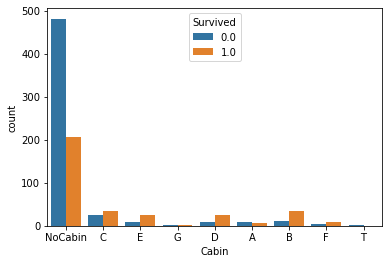

In [26]:
##無法用數字，就用圖觀察
#Seaborn as sns
#countplot 使用條形顯示每個分類 bin 中的觀察計數。
sns.countplot(df['Cabin'],hue = df['Survived'])

#遺失的Cabin 死亡率較高

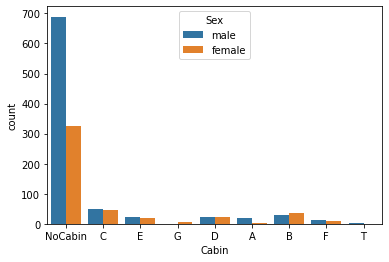

In [27]:
sns.countplot(df['Cabin'],hue = df['Sex'])
#遺失的Cabin 男性比例較高

In [53]:
#將字串轉換為數值可以計算

df[['Cabin','Survived']].groupby(['Cabin'],as_index=False).mean().sort_values(by='Survived',ascending=True)
#sort 排序，依照Survived 排序，用升冪(True)方式排序
#groupby 後面接要分析的名稱 . 後面接要運算函數名稱

#NoCabin Survivrd rate 最接近 T
#依照此結果，可以把NoCabin進行與T相同的補植

,Cabin,Survived
8,T,0.000000
7,N,0.299854
0,A,0.466667
6,G,0.500000
2,C,0.593220
5,F,0.615385
1,B,0.744681
4,E,0.750000
3,D,0.757576


In [65]:
df['Cabin'] = df['Cabin'].str.replace("N","T")

df['Cabin'].value_counts()

#然而從前面counts可以看到T只有1個，以及，計算存活率N靠近T，所以把N換成T沒有太大影響

T    1015
C      94
B      65
D      46
E      41
A      22
F      21
G       5
Name: Cabin, dtype: int64

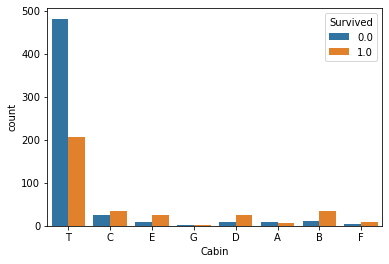

In [66]:
sns.countplot(df['Cabin'],hue=df['Survived'])

In [35]:
#Sex是字串 無法運算 用replace沒有成功
# df[['Cabin','Sex']].groupby(['Cabin'],as_index=False).mean().sort_values(by='Sex',ascending=True)

#### ===========自己玩玩的===================

In [46]:
df['Pclass'].value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

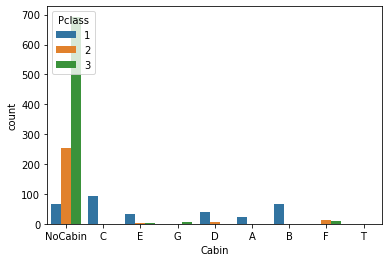

In [51]:
sns.countplot(df['Cabin'],hue = df['Pclass'])
#遺失值的Pclass是第3類最高，但是其他分布，幾乎沒有第3類，反而是聚焦在第1類 ???